In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz

In [135]:
df = pd.read_csv('balance-scale.csv')
print(df.shape)
print(df.head())

(625, 5)
  Class Name  Left weight  Left distance  Right weight  Right distance
0          B            1              1             1               1
1          R            1              1             1               2
2          R            1              1             1               3
3          R            1              1             1               4
4          R            1              1             1               5


In [136]:
X = df.drop('Class Name', axis=1)
y = df[['Class Name']]

In [137]:
X.shape

(625, 4)

In [138]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

x_test.shape

(188, 4)

In [139]:
clf_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3, min_samples_leaf=5)
clf_model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [140]:
y_pred = clf_model.predict(x_test)
y_pred[:5]

array(['L', 'L', 'L', 'R', 'L'], dtype=object)

In [141]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Accuracy

0.7021276595744681

In [142]:
target = list(df['Class Name'].unique())
feature_names = list(X.columns)

print(target, feature_names)

['B', 'R', 'L'] ['Left weight', 'Left distance', 'Right weight', 'Right distance']


In [38]:
feature_names

['Left weight', 'Left distance', 'Right weight', 'Right distance']

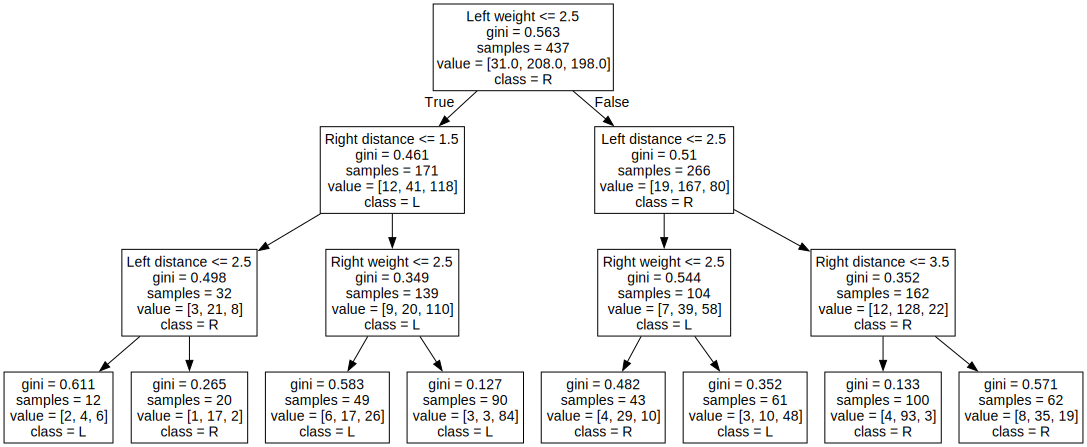

In [41]:
dot_data = tree.export_graphviz(clf_model, feature_names=feature_names, class_names=target)
graph = graphviz.Source(dot_data)
graph

In [43]:
importance = clf_model.feature_importances_
importance

array([0.30638143, 0.24837883, 0.22298144, 0.2222583 ])

In [46]:
data = pd.DataFrame({'feature': list(x_train.columns), 
                     'importance': importance}).sort_values('importance', ascending=False)

data

,feature,importance
0,Left weight,0.306381
1,Left distance,0.248379
2,Right weight,0.222981
3,Right distance,0.222258


------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz
from sklearn import datasets

data = datasets.load_iris()

feature = data.feature_names
target = data.target

data_ = pd.DataFrame(data.data, columns=feature)
data_['y'] = data.target

data_.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
x = data_.drop('y', axis=1)
y = data_['y']

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [4]:
model_D = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3, min_samples_leaf=5)
model_D.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [5]:
y_pred_D = model_D.predict(x_test)


In [6]:
proba = model_D.predict_proba(x_test)

In [7]:
print(metrics.accuracy_score(y_test, y_pred_D))

1.0


In [19]:
from collections import Counter

count = Counter(y)


first = list(x.columns)
second = ['1', '2', '3']

c = [str(i) for i in count.keys()]

print(c)

['0', '1', '2']


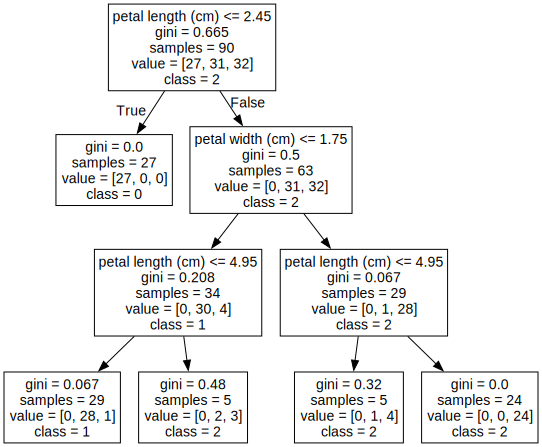

In [20]:
dot = tree.export_graphviz(model_D, feature_names=first, class_names=c)
g = graphviz.Source(dot)
g

In [10]:
feature_names = model_D.feature_importances_
feature_names

array([0.01559599, 0.05263646, 0.55575594, 0.3760116 ])

In [25]:
data_2 = pd.DataFrame({'feature_name': feature_name, 'importance': importance_}).sort_values('importance', ascending=False)
data_2

,feature_name,importance
2,petal length (cm),0.539046
3,petal width (cm),0.406368
1,sepal width (cm),0.037876
0,sepal length (cm),0.016710


-----

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
import graphviz


pima = load_iris()

In [94]:
df = pd.DataFrame(pima.data, columns=pima.feature_names)
df['y'] = pima.target
df.head()


x = df.iloc[::, :-1]
y = df.iloc[::, -1]

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [106]:
model_DC = DecisionTreeClassifier(criterion='entropy')
model_DC.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [107]:
y_pred_DC = model_DC.predict(x_test)

In [108]:
print('Accuract_score: ', metrics.accuracy_score(y_test, y_pred_DC))

Accuract_score:  0.9777777777777777


In [109]:
from collections import Counter

f_n = list(df.columns)
f_n = f_n[:-1]

t_r = Counter(df['y'])
t_r = [str(i) for i in t_r.keys()]
t_r

['0', '1', '2']

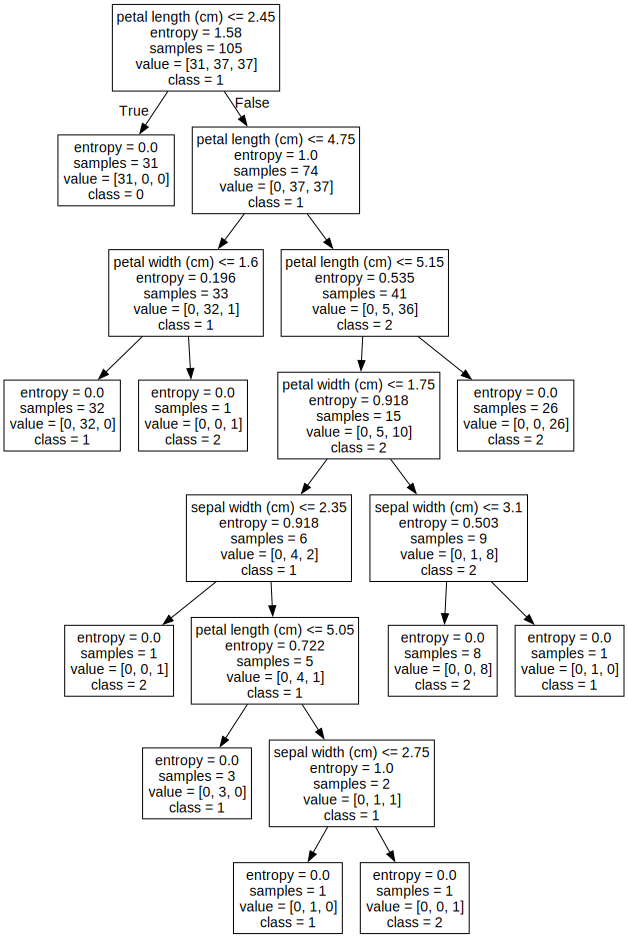

In [110]:
dot_data = tree.export_graphviz(model_DC, feature_names=f_n, class_names=t_r)
graph = graphviz.Source(dot_data)
graph

In [111]:
importance = model_DC.feature_importances_

data_f_im = pd.DataFrame({'feature_names': f_n,'importance': importance}).sort_values('importance', ascending=False)
data_f_im 

,feature_names,importance
2,petal length (cm),0.887716
3,petal width (cm),0.061479
1,sepal width (cm),0.050806
0,sepal length (cm),0.000000


In [117]:
from six import StringIO
from IPython.display import Image 
import pydotplus 


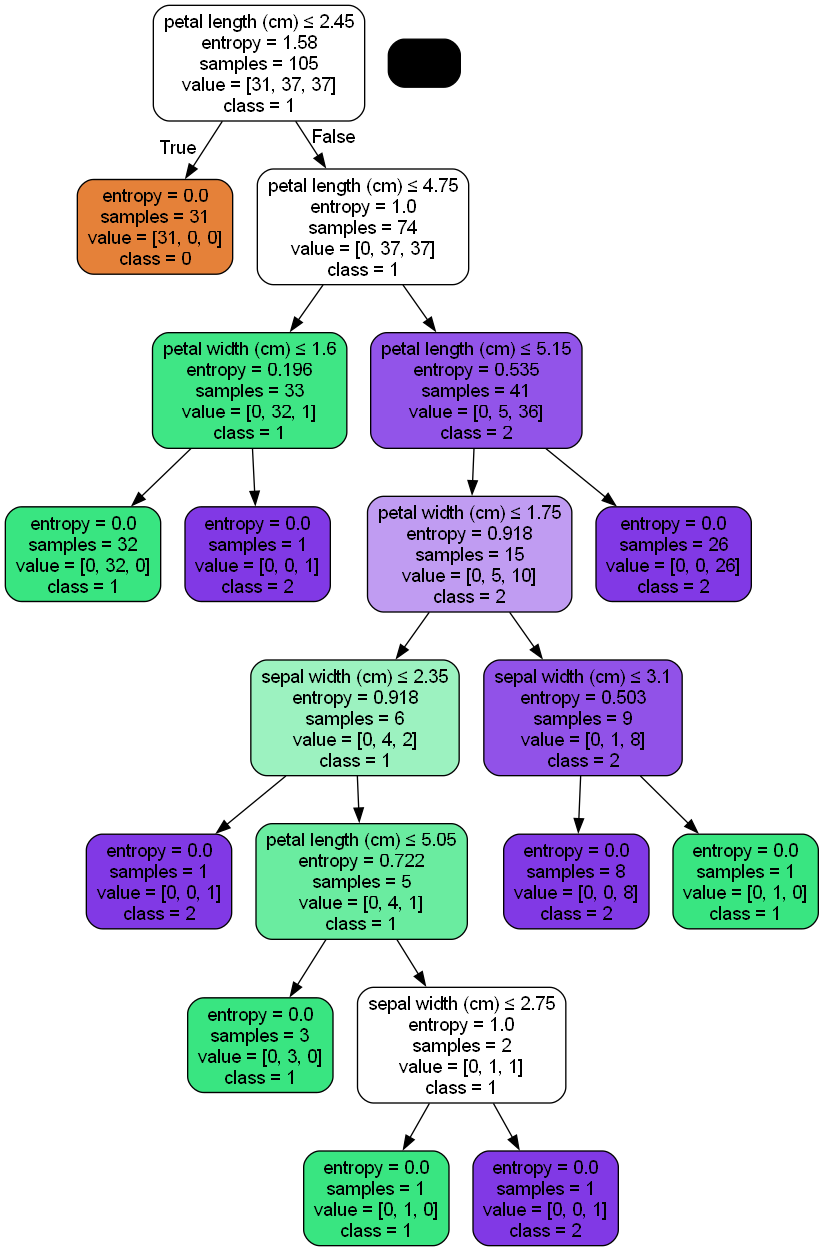

In [119]:
dot_data = StringIO()

tree.export_graphviz(model_DC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = f_n ,class_names=t_r)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

------------------------

In [59]:
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [22]:
x, y = load_iris(return_X_y=True)

data = load_iris()

In [18]:
df = pd.DataFrame(x, columns=data['feature_names'])

In [23]:
df['y'] = y

In [71]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

In [48]:
model = DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [51]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1])

In [58]:
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [61]:
feature = list(df.columns)[:-1]
feature

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

[Text(0.4, 0.9, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 90\nvalue = [31, 29, 30]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.7, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 59\nvalue = [0, 29, 30]'),
 Text(0.2, 0.5, 'petal length (cm) <= 5.0\ngini = 0.175\nsamples = 31\nvalue = [0, 28, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]'),
 Text(0.3, 0.3, 'sepal length (cm) <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'petal length (cm) <= 4.85\ngini = 0.069\nsamples = 28\nvalue = [0, 1, 27]'),
 Text(0.7, 0.3, 'sepal width (cm) <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 25]')

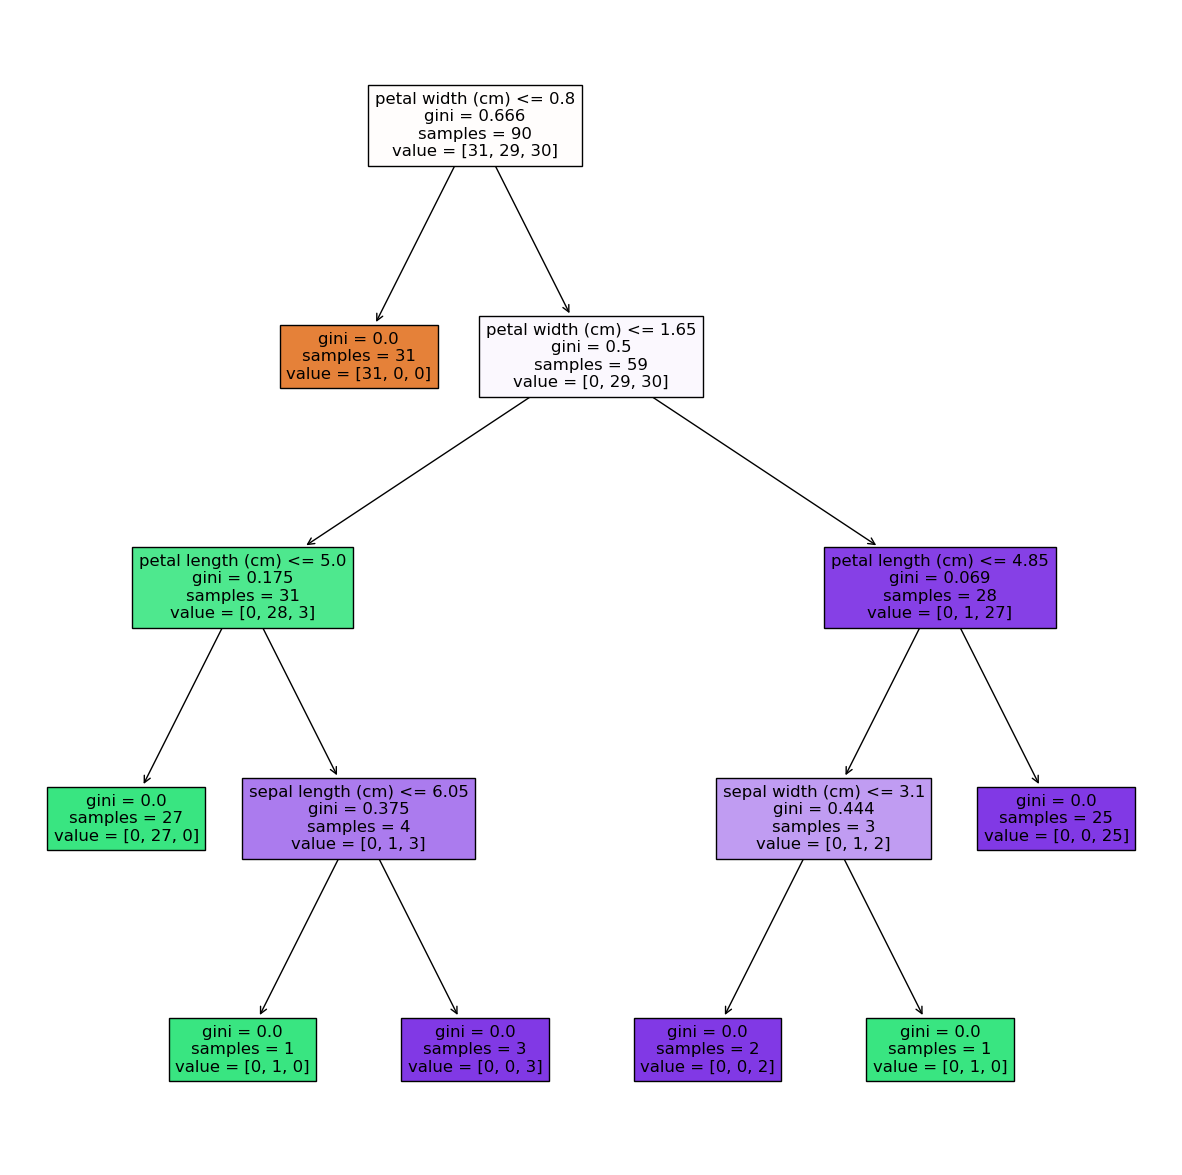

In [67]:
plt.figure(figsize=(15, 15))
plot_tree(model, feature_names=feature, filled=True)

In [76]:
model.feature_importances_

array([0.02500926, 0.02223046, 0.07527109, 0.87748919])

In [77]:
np.bincount(y)

array([50, 50, 50], dtype=int64)